In [1]:
import pandas as pd
import datasist as ds
import numpy as np
import seaborn as sns

/home/miguel/.cache/pypoetry/virtualenvs/pbe_for_molecules-GBFEFQnP-py3.9/lib/python3.9/site-packages/datasist/feature_engineering.py:155: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if method is 'mean':
/home/miguel/.cache/pypoetry/virtualenvs/pbe_for_molecules-GBFEFQnP-py3.9/lib/python3.9/site-packages/datasist/feature_engineering.py:158: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif method is 'median':
/home/miguel/.cache/pypoetry/virtualenvs/pbe_for_molecules-GBFEFQnP-py3.9/lib/python3.9/site-packages/datasist/feature_engineering.py:161: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif method is 'mode':
/home/miguel/.cache/pypoetry/virtualenvs/pbe_for_molecules-GBFEFQnP-py3.9/lib/python3.9/site-packages/datasist/structdata.py:81: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(date_cols) is not 0:
/home/miguel/.cache/pypoetry/virtualenvs/pbe_for_molecules-GBFEFQnP-py3.9/lib/python3.9/site-packages/datasist/project.py:152

In [18]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
%cd /home/miguel/Documentos/Master-Degree-Research/Positron-Binding-Energy/src

/home/miguel/Documentos/Master-Degree-Research/Positron-Binding-Energy/src


In [3]:
# This is data cointaining all apolar molecules
all_df = pd.read_csv("../../data/processed/processed_apolar.csv")
partial_df = pd.read_csv("../../data/final/final_apolar.csv")

# All 20 Molecules

In [21]:
# Creating a description for the data
ds.structdata.describe(all_df)

First five data points


,Molecule,Formula,Ei,Alpha,Expt,pi_bond
0,Butane,C4H10,10.6,8.1,35,0
1,Pentane,C5H12,10.4,10.0,60,0
2,Hexane,C6H14,10.2,11.8,80,0
3,Heptane,C7H16,9.9,13.7,105,0
4,Octane,C8H18,10.0,15.5,115,0




Random five data points


,Molecule,Formula,Ei,Alpha,Expt,pi_bond
11,Benzene,C6H6,9.3,10.4,150,3
7,Hexadecane,C16H34,9.9,30.3,310,0
10,Cyclohexane,C6H12,9.9,11.8,80,0
8,Ethylene,C2H4,10.5,4.2,20,1
0,Butane,C4H10,10.6,8.1,35,0




Last five data points


,Molecule,Formula,Ei,Alpha,Expt,pi_bond
15,TetraDecane,C14H30,9.9,26.60,260,0
16,Propane,C3H8,11.1,6.30,10,0
17,Tetrachloroethylene,C2Cl4,9.3,12.30,57,1
18,1-2-trans-Dichloroethylene,C2H2Cl2,9.6,8.15,15,1
19,Carbondisulfide,CS2,10.1,8.70,75,2




Shape of  data set: (20, 6)


Size of  data set: 120


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
Molecule,object
Formula,object
Ei,float64
Alpha,float64
Expt,int64
pi_bond,int64




Numerical Features in Data set
['Ei', 'Alpha', 'Expt', 'pi_bond']


Categorical Features in Data set


['Molecule', 'Formula']



Statistical Description of Columns


,Ei,Alpha,Expt,pi_bond
count,20.000000,20.000000,20.000000,20.000000
mean,9.915000,12.932500,109.200000,0.750000
std,0.602866,6.935953,94.098269,1.332785
min,8.200000,4.200000,10.000000,0.000000
25%,9.825000,8.187500,51.500000,0.000000
50%,9.900000,11.100000,78.500000,0.000000
75%,10.225000,15.775000,146.250000,1.000000
max,11.100000,30.300000,310.000000,5.000000




Description of Categorical Features


,count,unique,top,freq
Molecule,20,20,Butane,1
Formula,20,19,C5H12,2




Unique class Count of Categorical features


,Feature,Unique Count
0,Molecule,20
1,Formula,19




Missing Values in Data


,features,missing_counts,missing_percent
0,Molecule,0,0.0
1,Formula,0,0.0
2,Ei,0,0.0
3,Alpha,0,0.0
4,Expt,0,0.0
5,pi_bond,0,0.0


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

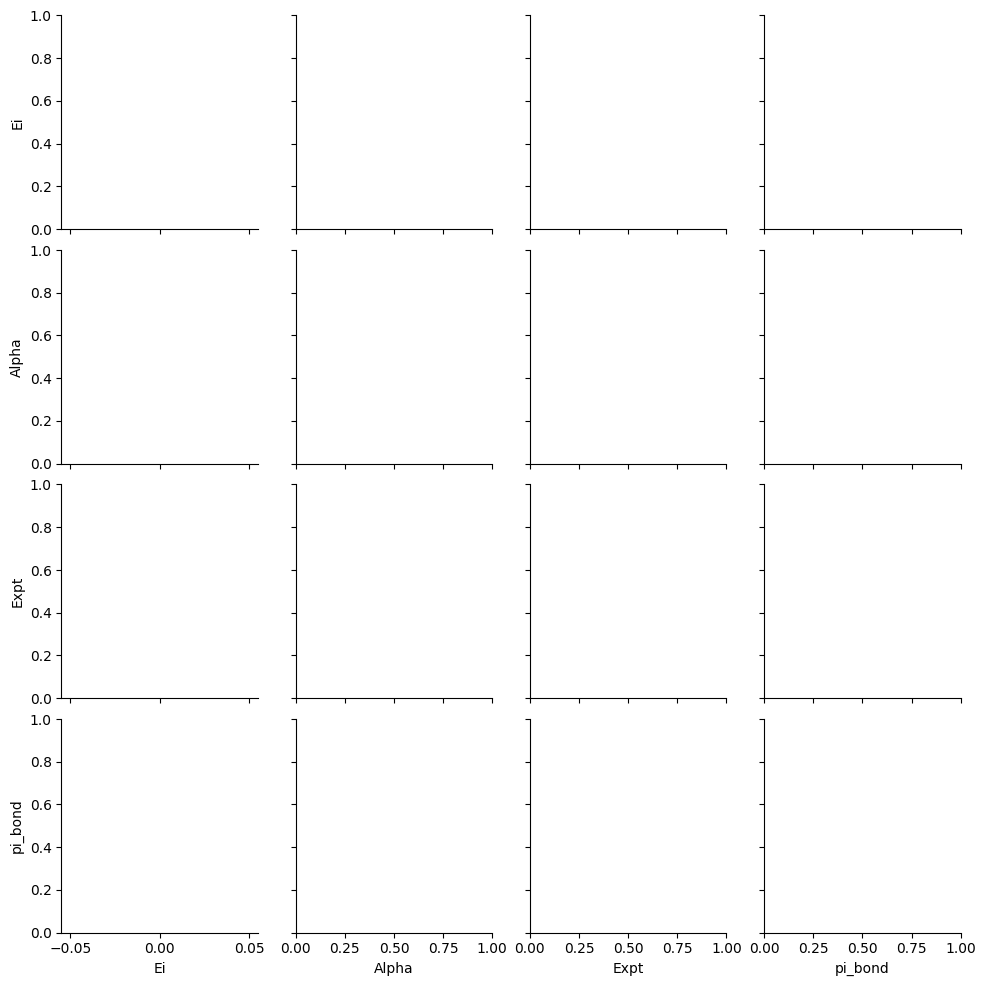

In [27]:
from utils.data import log_transform_dataframe
transformed_data_all = log_transform_dataframe(all_df, ['Ei', 'Alpha', 'Expt'])
sns.pairplot(all_df)

In [ ]:
from sklearn.svm import SVR
from evaluate_models import show_metrics

x0 = all_df.drop(['Molecule', 'Formula','Expt'],axis=1)
y0 = all_df[['Expt']]

show_metrics(SVR(kernel = 'linear'), x0, y0, 5)


Test Scores: [0.01937457 0.04320986 0.4830854  0.22712142 0.90682647]
Mean Test Scores: 0.34
Std of Scores: 0.33
Min and Max of Scores: 0.02, 0.91

Train Score: 0.28



In [ ]:
from sklearn.linear_model import LinearRegression
show_metrics(LinearRegression(), x0, y0, 5)


Test Scores: [0.17203118 0.01822387 1.16727602 0.12005978 1.26774099]
Mean Test Scores: 0.55
Std of Scores: 0.55
Min and Max of Scores: 0.02, 1.27

Train Score: 0.35



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

transformer = FunctionTransformer(log_transform)

numerical_transformer = ColumnTransformer([('log', transformer, [0, 1])])

svr = Pipeline([('log', numerical_transformer), ('reg', SVR(kernel='linear'))])
lin = Pipeline([('log', numerical_transformer), ('reg', LinearRegression())])

In [ ]:
show_metrics(svr, x0, y0, 5)


Test Scores: [0.4370173  0.58934051 2.4200089  0.42792806 3.40207205]
Mean Test Scores: 1.46
Std of Scores: 1.23
Min and Max of Scores: 0.43, 3.4

Train Score: 1.3



In [3]:
'pi' in 'PI E OI'.lower()

True

In [ ]:
show_metrics(lin, x0, y0, 5)


Test Scores: [0.25959972 0.16486012 2.35013489 0.34171023 2.80865144]
Mean Test Scores: 1.18
Std of Scores: 1.15
Min and Max of Scores: 0.16, 2.81

Train Score: 0.74



In [ ]:
# This test was just to compare if the log transform could help us, but it seens it won't

# 17 Molecules

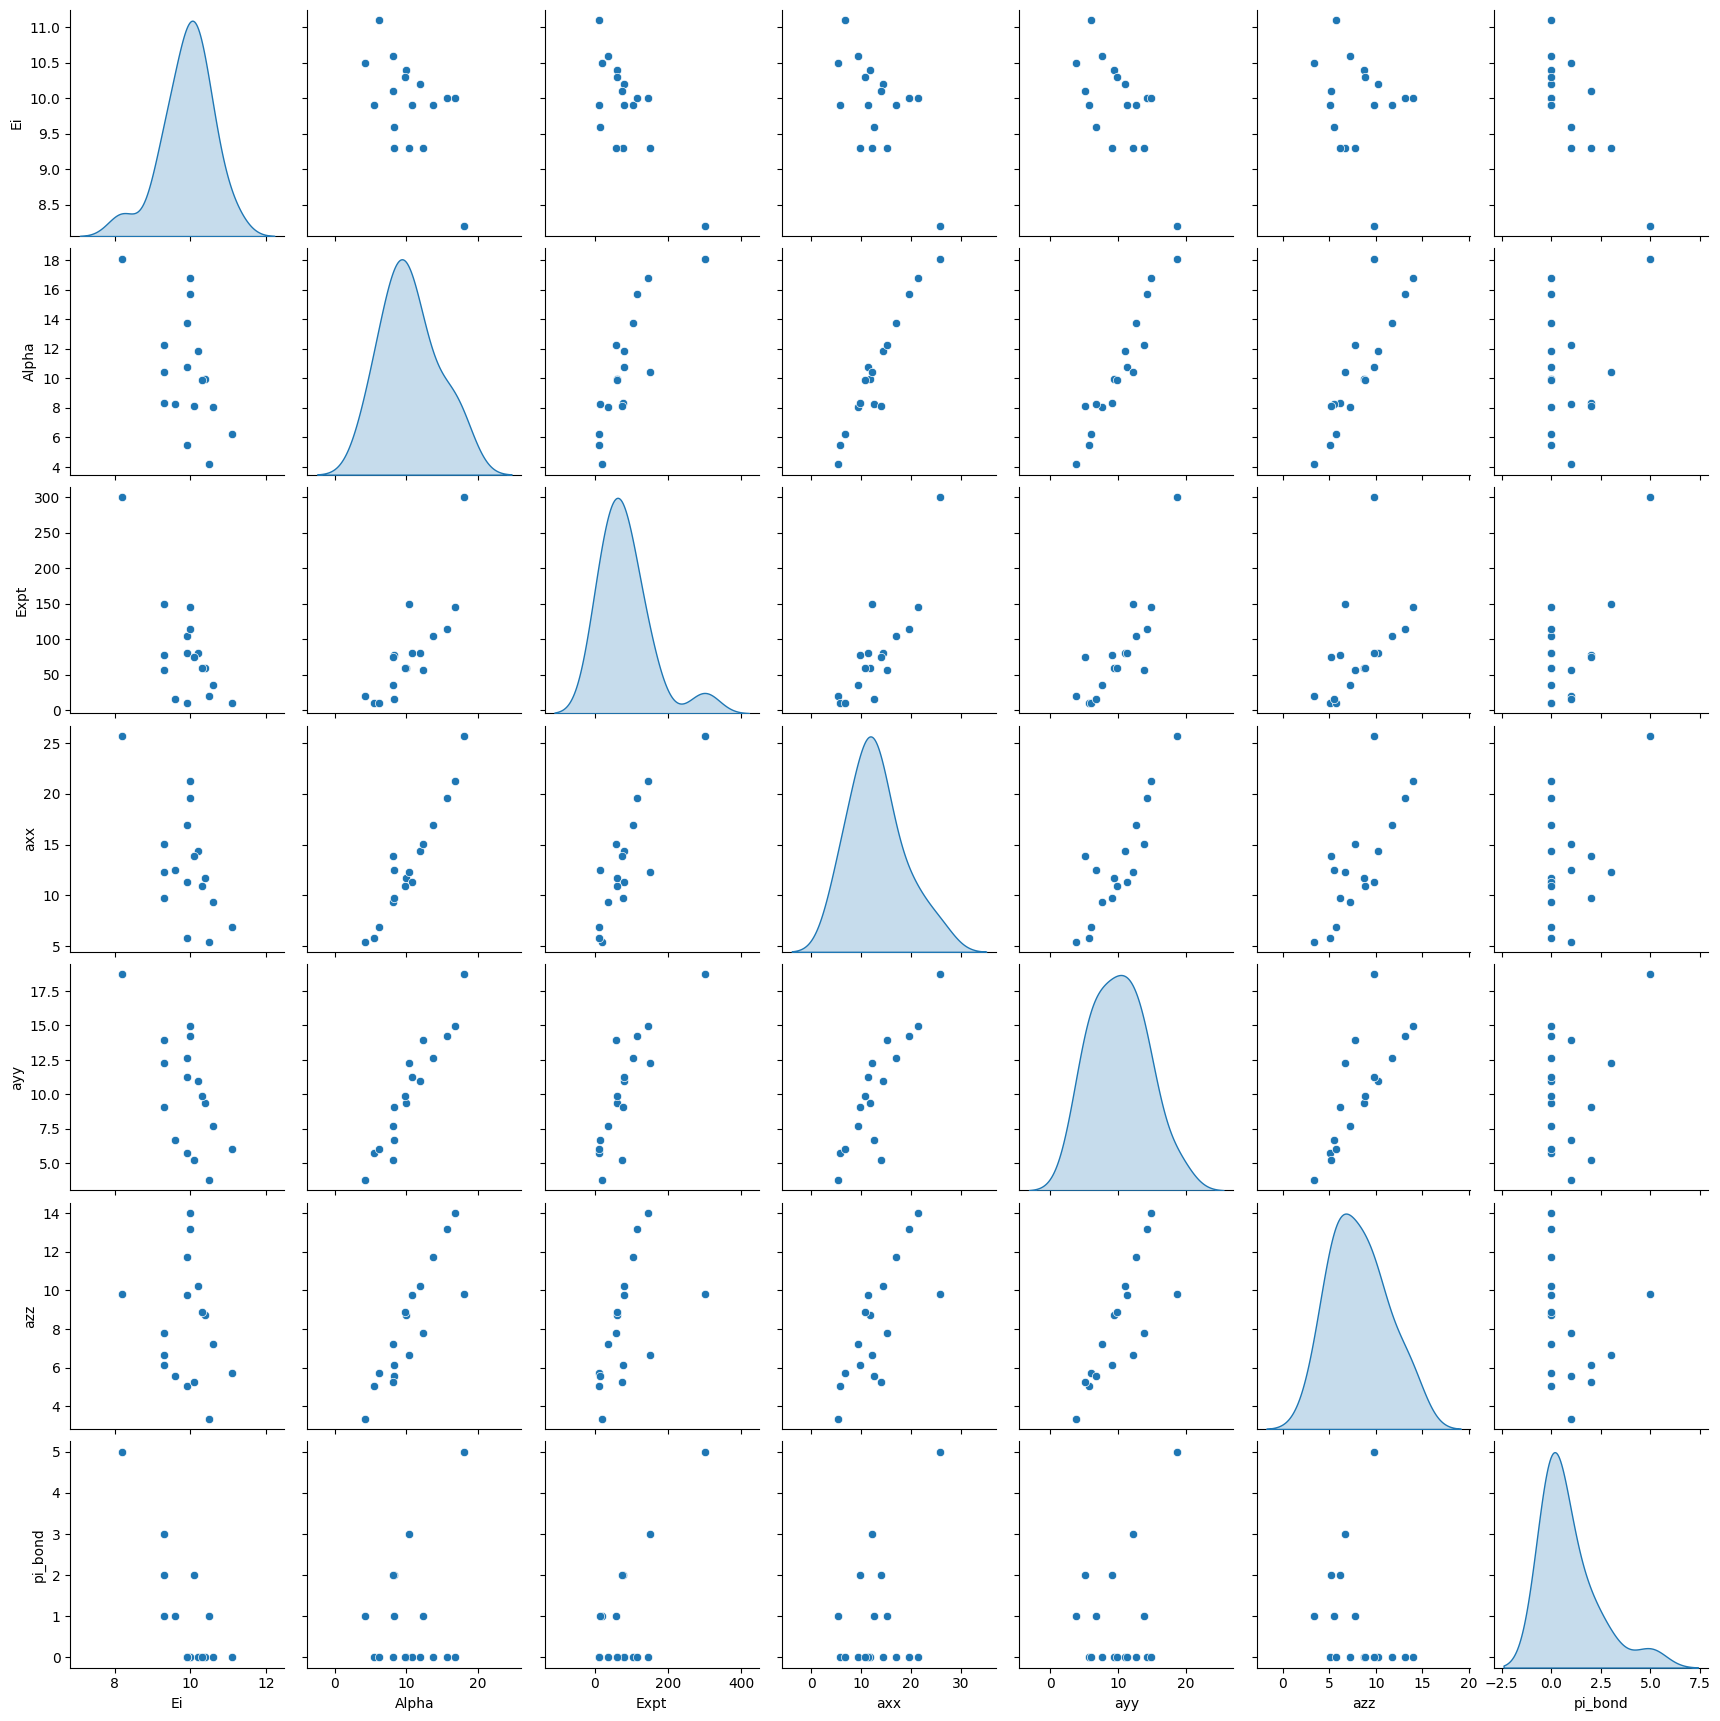

In [ ]:
sns.pairplot(partial_df, diag_kind='kde')

In [ ]:
# Since axx, ayy and azz are already normal we are not transforming them.